1. A Simple Linear Regression model predicts an outcome ￼ as ￼, where ￼ is the intercept, ￼ is the slope, and ￼ represents random errors drawn from a normal distribution to account for variability around the line. Here, ￼ values are sampled uniformly, and combined with errors to generate ￼ values that follow the linear relationship with normal-distributed deviations.

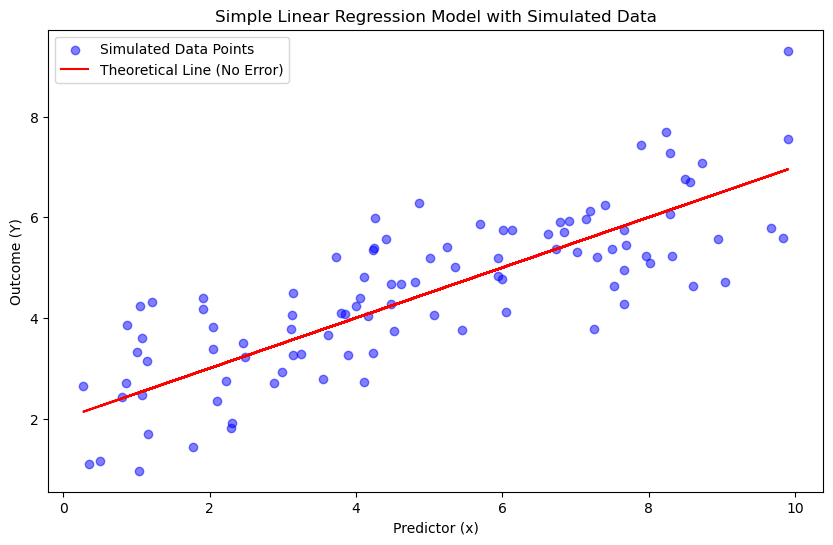

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Parameters
n = 100
beta0 = 2
beta1 = 0.5
sigma = 1

# Generating data
x = uniform.rvs(size=n, loc=0, scale=10)
errors = norm.rvs(size=n, loc=0, scale=sigma)
Y = beta0 + beta1 * x + errors

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, Y, color="blue", alpha=0.5, label="Simulated Data Points")
plt.plot(x, beta0 + beta1 * x, color="red", label="Theoretical Line (No Error)")
plt.xlabel("Predictor (x)")
plt.ylabel("Outcome (Y)")
plt.title("Simple Linear Regression Model with Simulated Data")
plt.legend()
plt.show()

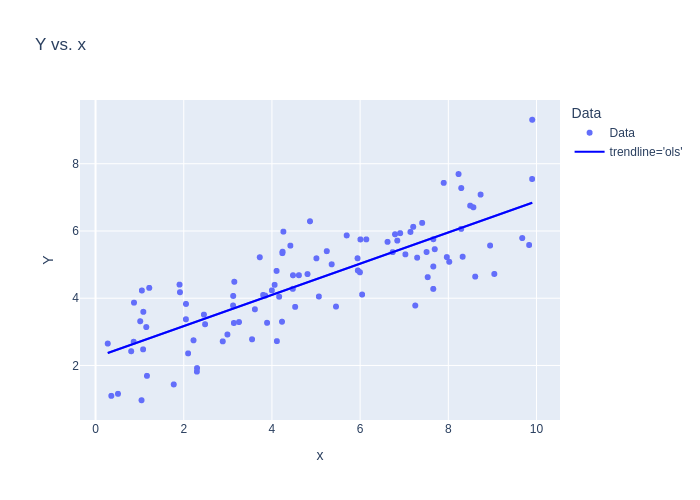

In [6]:
#2. 
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Create DataFrame with simulated x and Y values
df = pd.DataFrame({"x": x, "Y": Y})  # Assuming 'x' and 'Y' are from Question 1

# Fit Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Plotting data and fitted trendline
df['Data'] = 'Data'
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")
fig.show(renderer="png")

3. The orange dashed line represents the theoretical relationship ( Y = \beta_0 + \beta_1 \cdot x ) without random variation, while the blue fitted line shows the regression line based on our simulated data, which includes random sampling noise. The difference highlights how sampling variation affects the fitted line, making it approximate but not identical to the theoretical line each time we sample.

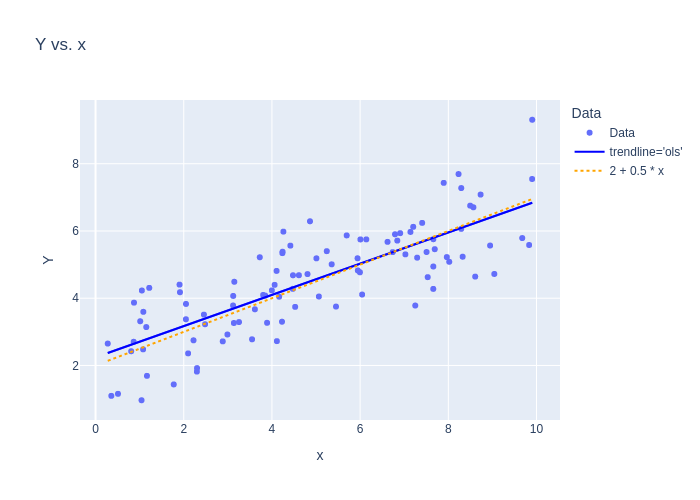

In [8]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np

# Assuming x, Y, beta0, and beta1 are from Question 1
df = pd.DataFrame({"x": x, "Y": Y})

# Fit model and visualize
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

df['Data'] = 'Data'
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Add theoretical line
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=f"{beta0} + {beta1} * x", line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

4. fitted_model.fittedvalues are the predicted ￼ values computed as ￼, using the estimated coefficients ￼ and ￼ from fitted_model.params. These values reflect the best-fit line based on observed data, unlike the theoretical model which uses true coefficients without random variation.

5. The ordinary least squares (OLS) method chooses the line that minimizes the sum of squared residuals ￼, where each residual is the difference between an observed value ￼ and its predicted value ￼. Squaring the residuals prevents negative and positive differences from canceling out and emphasizes larger deviations, resulting in the line that best fits the observed data.

6. The first expression, ￼, measures the proportion of the total variation in ￼ that is explained by the model. This is because the numerator captures the variation in ￼ not explained by the model (the residuals), and the denominator represents the total variation in ￼ around its mean. Therefore, fitted_model.rsquared, which is calculated using this expression, indicates how well the model fits the data: a higher ￼ means a better fit.
<p>
The expression np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 represents the squared correlation between ￼ and the model’s predictions ￼, which also equals ￼ and reflects the alignment between observed and predicted values. Similarly, np.corrcoef(Y, x)[0,1]**2 measures the squared correlation between ￼ and the predictor ￼, showing how strongly ￼ is linearly associated with ￼ in the Simple Linear Regression model.

7. Simple Linear Regression assumes a linear relationship between the predictor and outcome, but here, crop yield appears to increase non-linearly with fertilizer amount. Additionally, it assumes residuals are normally distributed, yet the histogram of residuals is skewed, indicating this assumption may not hold. These issues suggest the model may not fit the data well.

8. The null hypothesis states that there is no linear association between waiting time and eruption duration (￼). Using the p-value from the regression output:
	•	If p > 0.1, we have no evidence against ￼, suggesting no significant association.
	•	If 0.1 ≥ p > 0.05, there’s weak evidence against ￼.
	•	If 0.05 ≥ p > 0.01, there’s moderate evidence against ￼.
	•	If p ≤ 0.01, we find strong to very strong evidence against ￼, indicating a significant linear relationship between waiting time and eruption duration.

9. For short wait times (<62, <64, <66 minutes), the null hypothesis is that there’s no linear association between waiting time and eruption duration (￼). For each limit:
	•	p-value > 0.1: No evidence of a relationship.
	•	0.1 ≥ p > 0.05: Weak evidence of a relationship.
	•	p ≤ 0.05: Strong evidence of a relationship.

This tests if the association seen in the full dataset holds within shorter waits.

Limit: 62 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


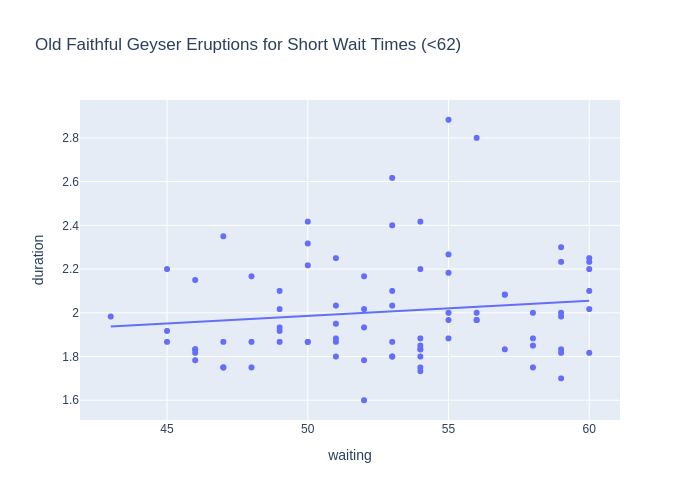

Limit: 64 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


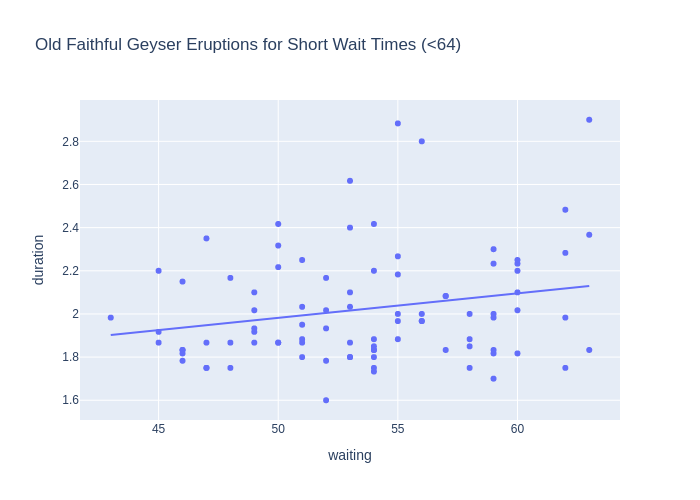

Limit: 66 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


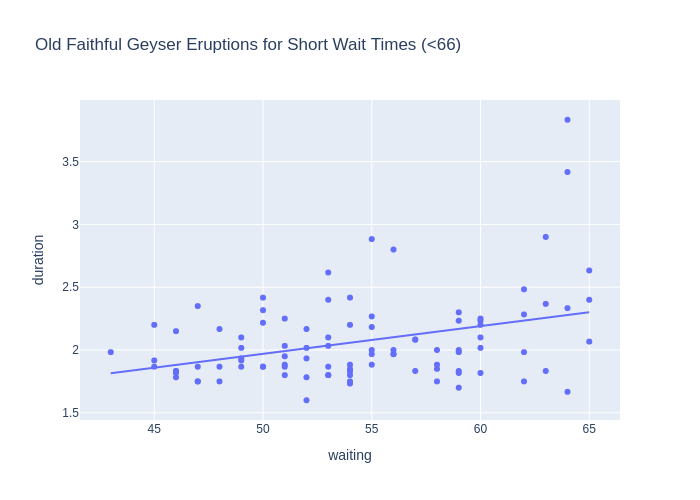

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the short wait limits
short_wait_limits = [62, 64, 66]

# Iterate over each short wait limit to fit the model and display results
for limit in short_wait_limits:
    # Filter data for short waits
    short_wait_data = old_faithful[old_faithful['waiting'] < limit]
    
    # Fit the Simple Linear Regression model for the short wait data
    model = smf.ols('duration ~ waiting', data=short_wait_data).fit()
    print(f"Limit: {limit} minutes")
    print(model.summary().tables[1])  # Display p-value of slope coefficient for evidence

    # Scatter plot with a linear trendline for each short wait limit
    fig = px.scatter(short_wait_data, x='waiting', y='duration',
                     title=f"Old Faithful Geyser Eruptions for Short Wait Times (<{limit})",
                     trendline='ols')
    fig.show(renderer="png")  # Show each figure with linear trendlines

10. This code investigates the relationship between waiting time and eruption duration for long waits (over 71 minutes) in the Old Faithful dataset.
	1.	Bootstrap Analysis: We generate 1,000 bootstrap samples from the long-wait dataset and fit a Simple Linear Regression model to each, collecting the slope coefficients. From these, we calculate a 95% bootstrapped confidence interval for the slope, which provides an estimate of the range of slope values we might expect by repeatedly sampling from the data.
	2.	Null Hypothesis Simulation: We simulate 1,000 datasets under the null hypothesis (no linear association) using parameters ￼, ￼, and ￼. For each simulated dataset, we fit a model and collect the slope coefficients, calculating the proportion of slopes as extreme as the observed slope in the original data. This proportion is our simulated p-value, indicating the strength of evidence against the null hypothesis.
	3.	Interpretation: The bootstrapped confidence interval shows the typical range of slopes based on the data, while the simulated p-value tells us whether the observed data provides significant evidence of a linear relationship.

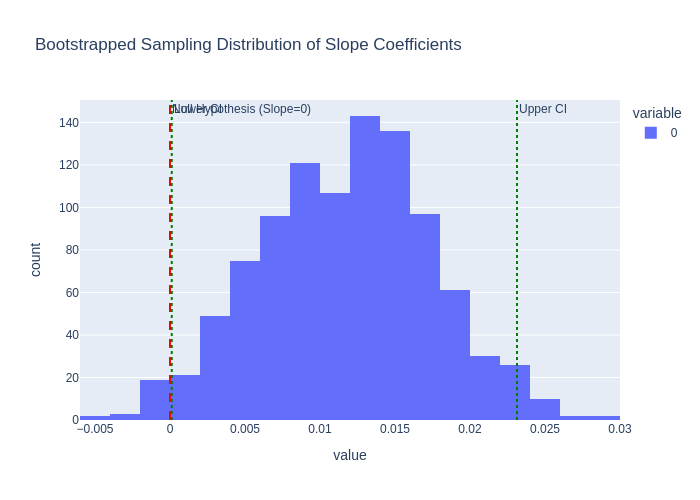

Bootstrapped 95% Confidence Interval for Slope Coefficient: [0.00012147 0.02313381]
Simulated p-value for slope coefficient under null hypothesis: 0.037


In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px
import seaborn as sns

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Filter for long waits over 71 minutes
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Simulation parameters
beta0, beta1, sigma = 1.65, 0, 0.37
n_bootstrap_samples = 1000

# 1. Bootstrap Sampling
bootstrapped_slope_coefficients = []
for _ in range(n_bootstrap_samples):
    bootstrap_sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params.iloc[1])  # Use iloc to access slope

# 2. Simulation under Null Hypothesis
simulated_slope_coefficients = []
for _ in range(n_bootstrap_samples):
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = beta0 + beta1 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=sigma).rvs(size=len(old_faithful_simulation))
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params.iloc[1])  # Use iloc to access slope

# 3. Confidence Interval and p-value
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)
simulated_slope_coefficients = np.array(simulated_slope_coefficients)
bootstrap_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params.iloc[1]  # Use iloc to access slope
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# 4. Visualize Bootstrapped Distribution
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.add_vline(x=0, line_dash="dash", line_color="red", annotation_text="Null Hypothesis (Slope=0)")
fig.add_vline(x=bootstrap_ci[0], line_dash="dot", line_color="green", annotation_text="Lower CI")
fig.add_vline(x=bootstrap_ci[1], line_dash="dot", line_color="green", annotation_text="Upper CI")
fig.show(renderer="png")

# Print Results
print("Bootstrapped 95% Confidence Interval for Slope Coefficient:", bootstrap_ci)
print("Simulated p-value for slope coefficient under null hypothesis:", simulated_p_value)

11.
	1.	Previous Models: The previous models (smf.ols('duration ~ waiting', data=old_faithful)) assessed a continuous relationship between waiting time and duration, fitting separate regression lines for “short” and “long” waits when split at 64 and 71 minutes.
	2.	Current Model with Indicator Variable: This model categorizes waits into “short” (<68 minutes) and “long” (≥68 minutes) using an indicator variable kind. The regression now tests for an average difference in duration between “short” and “long” wait groups, instead of a continuous linear relationship.
	3.	Evidence against Null Hypothesis: By examining the p-value for the “kind” coefficient in the model summary, we test for evidence of a significant difference in eruption duration between the two wait time groups. ￼

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


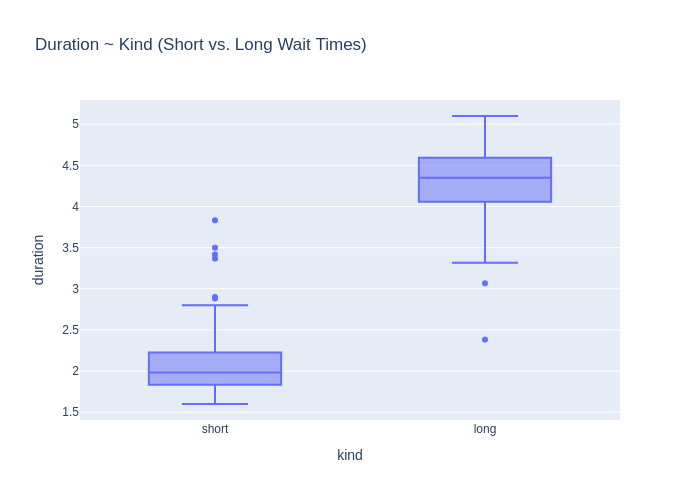

In [8]:
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
from IPython.display import display
import seaborn as sns

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the "kind" indicator variable based on wait time cutoff at 68 minutes
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Fit the Simple Linear Regression model using the "kind" indicator variable
indicator_model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary table for evidence against the null hypothesis
display(indicator_model.summary().tables[1])

# Create a box plot to visualize duration differences between "short" and "long" waits
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration ~ Kind (Short vs. Long Wait Times)',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")